# ADVANCED STATISTICS FOR PHYSICS ANALYSIS - First Lab

### Student: Alessandro Marcomini (2024286)


### Date: April 18, 2021

In [1]:
library(ggplot2)
library(tidyverse)
library(RCurl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Exercise 1 - vectors and data frames
- The following table gives the volume, area, length and maximum and mean depths of some Scottish lakes. Create vectors, holding the lake’s name and all the parameters and build a dataframe called scottish.lakes from the vectors

In [2]:
Loch <- #Lake names
c('Loch Ness','Loch Lomond','Loch Morar','Loch Tay','Loch Awe','Loch Maree','Loch Ericht',
  'Loch Lochy','Loch Rannoch','Loch Shiel','Loch Katrine','Loch Arkaig','Loch Shin')

Volume <-  #Km3
c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)

Area <- #Km2
c(56,71,27,26.4,39,28.6,18.6,16,19,19.5,12.4,16,22.5)

Lenght <- #Km
c(39,36,18.8,23,41,20,23,16,15.7,28,12.9,19.3,27.8)

Max_depth <- #m
c(230,190,310,150,94,114,156,162,134,128,151,109,49)

Mean_depth <- #m
c(132,37,87,60.6,32,38,57.6,70,51,40,43.4,46.5,15.05)

df <- data.frame(Loch, Volume, Area, Max_depth, Mean_depth)
df

Loch,Volume,Area,Max_depth,Mean_depth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,56.0,230,132.00
Loch Lomond,2.60,71.0,190,37.00
Loch Morar,2.30,27.0,310,87.00
Loch Tay,1.60,26.4,150,60.60
Loch Awe,1.20,39.0,94,32.00
Loch Maree,1.09,28.6,114,38.00
Loch Ericht,1.08,18.6,156,57.60
Loch Lochy,1.07,16.0,162,70.00
Loch Rannoch,0.97,19.0,134,51.00


#### 1. evaluate the highest and lowest volume and area lake;


In [3]:
x = which.max(df[,"Volume"])
sprintf('The lake with largest volume is %s, with a Volume of %g km^3', df[x,"Loch"], df[x,"Volume"]) 

x = which.min(df[,"Volume"])
sprintf('The lake with smaller volume is %s, with a Volume of %g km^3', df[x,"Loch"], df[x,"Volume"])

x = which.max(df[,"Area"])
sprintf('The lake with larger area is %s, with an Area of %g km^2', df[x,"Loch"], df[x,"Area"])

x = which.min(df[,"Area"])
sprintf('The lake with smaller area is %s, with an Area of %g km^2', df[x,"Loch"], df[x,"Area"])


[1] "The lake with largest volume is Loch Ness, with a Volume of 7.45 km^3"

[1] "The lake with smaller volume is Loch Shin, with a Volume of 0.35 km^3"

[1] "The lake with larger area is Loch Lomond, with an Area of 71 km^2"

[1] "The lake with smaller area is Loch Katrine, with an Area of 12.4 km^2"

#### 2. order the frame with respect to the area and determine the two largest area lakes;

In [4]:
print("Those are the two largest lakes of Scotland:")
head(df[order(Area, decreasing = TRUE),],n=2)

[1] "Those are the two largest lakes of Scotland:"


,Loch,Volume,Area,Max_depth,Mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71,190,37
1,Loch Ness,7.45,56,230,132


#### 3. by summing up the areas occpupied by the lakes, determine the area of Scotland covered by water.

In [5]:
sprintf('The total surface of Scotland is 77910 km^2.')
sprintf("The total survace covered by lakes amounts to %i km^2.", sum(df[,"Area"]))
pct= 100*sum(df[,"Area"])/77910
sprintf("Scotland lakes cover the %.3g%% of the national area.", pct)

[1] "The total surface of Scotland is 77910 km^2."

[1] "The total survace covered by lakes amounts to 372 km^2."

[1] "Scotland lakes cover the 0.477% of the national area."

## Exercise 2 - Crude Oil Production

 • The following CSV file https://drive.google.com/file/d/1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3/view contains data on crude oil prices from 1861 to 2019, measured in US dollars per barrel.
#### 1. Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure).

In [6]:
#Loading data
filepath = "/Users/ale/AdvStat/Ex01/DATA/crude-oil-prices.csv"
df = read.csv(filepath, header=TRUE, skip=1)
head(df)
print("Looking at the dataframe, first two columns apprear to be useless (same value for all rows):I will drop them.")
df <- df[-c(1,1:2)]
head(df)

,Entity,Code,Year,OilPrice
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74


[1] "Looking at the dataframe, first two columns apprear to be useless (same value for all rows):I will drop them."


,Year,OilPrice
,<int>,<dbl>
1,1861,0.49
2,1862,1.05
3,1863,3.15
4,1864,8.06
5,1865,6.59
6,1866,3.74


#### 2. produce a plot with the Oil price as a function of the year

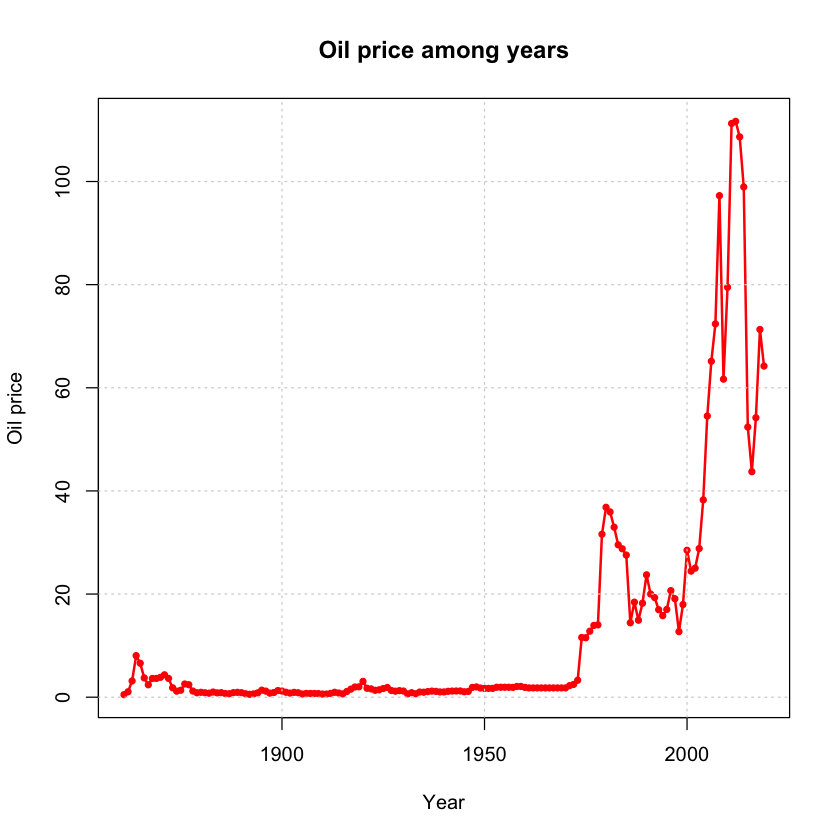

In [7]:
plot(df[[1]],df[[2]], pch=20, cex=1, col='red', xlab = 'Year',ylab='Oil price')
lines(df[[1]],df[[2]], col='red', lty = 1, lw=2)
title('Oil price among years')
grid()

#### 3. which is the highest price in history? When did it occur?

In [8]:
x = which.max(df[,"OilPrice"])
sprintf('The maximum price for Oil has been %.4g US dollars per barrel, reached in year %i', df[x,"OilPrice"], df[x,"Year"]) 

[1] "The maximum price for Oil has been 111.7 US dollars per barrel, reached in year 2012"

#### 4. plot the derivative of the curve, simply evaluated with the finite difference formula (forward derivative):
$$
\frac{\partial_{price}}{{\partial_{year}}} = price_{j+1} - price{j}
$$

Sol: The derivative of the curve is simply given by the diff() function of R applied to the second column of the dataframe, thus:

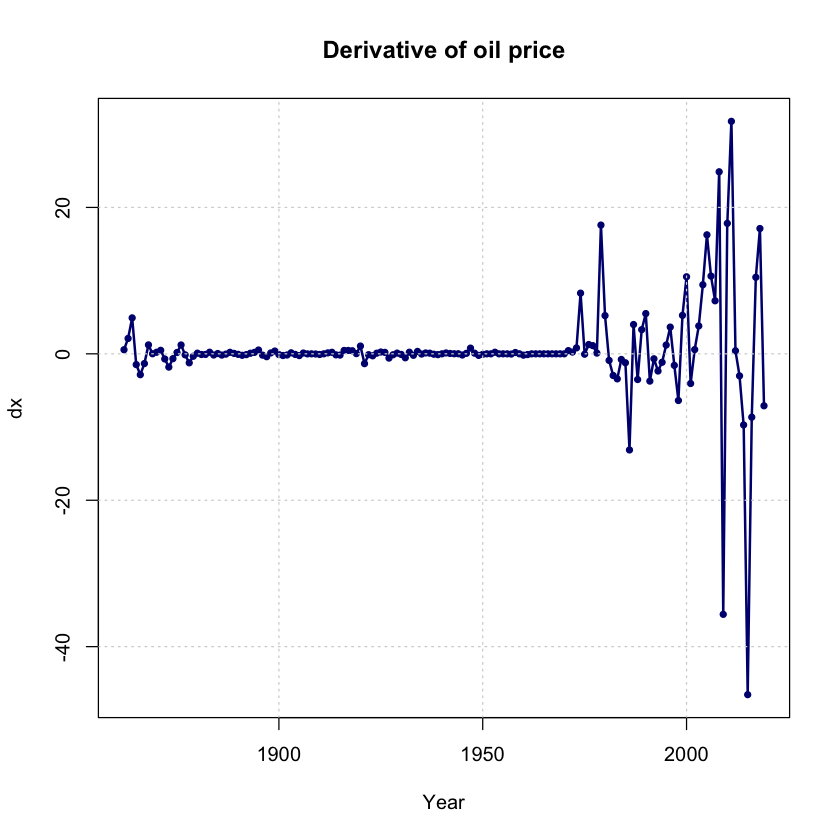

In [9]:
dx = diff(df[[2]])
plot(df$Year[-1],dx, pch=20, cex=1, col='navy', xlab='Year', ylab='dx')
lines(df$Year[-1],dx, col='navy', lty = 1, lw=2)
title('Derivative of oil price')
grid()

## Exercise 3 - World Coal Production
- The following CSV file https://drive.google.com/file/d/10kgRQGKEC81QoVW9kj8goNzzyLcT0xld/view contains data on the coal production (in TW · hour) for several countries in the World.

#### 1. Write R code that is able to read the file and import it in a tibble structure

In [10]:
filepath = "/Users/ale/AdvStat/Ex01/DATA/coal-production-by-country.csv"
dft = tibble(read.csv(filepath, header=TRUE))
colnames(dft)[4] <- 'Coal_ProductionTWh'
dft[dft['Code']=='','Code'] <- dft[dft['Code']=='','Entity']
head(dft)

Entity,Code,Year,Coal_ProductionTWh
<chr>,<chr>,<int>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0


#### 2. count the number of countries available in the file and produce a barplot with the number of entries for each country

[1] "The total number of countries available is 200, over the total 11528 rows."

[1] "Here is a summary of the number of entries:"

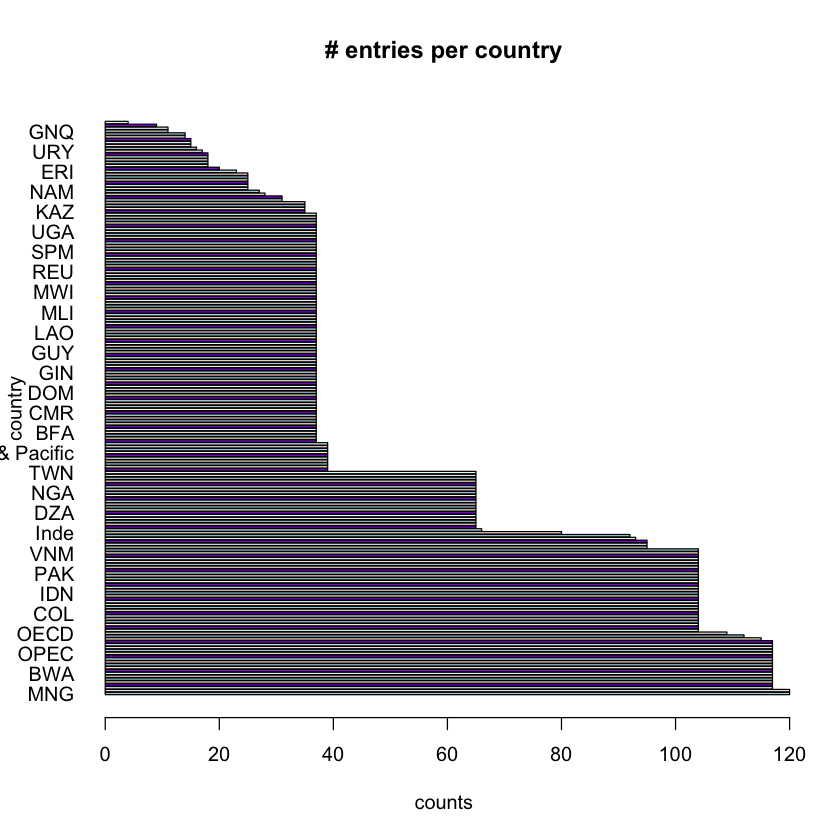

In [11]:
n <- length(dft[[1]])
country_uniq <- unique(dft[[1]])
m <- length(country_uniq)
sprintf('The total number of countries available is %i, over the total %i rows.', m, n)
bplot_dft <- dft %>% count(Code, sort=T)
sprintf('Here is a summary of the number of entries:')
data_bar <- bplot_dft[[2]]
names(data_bar) <- bplot_dft[[1]]
labels_list = unique(dft['Code'])
barplot(data_bar, beside=FALSE, col = c('lightblue', 'mistyrose', 'lightcyan', 'purple', 'cornsilk'),
        horiz=TRUE,las=1, plot=TRUE, width=10, xlab='counts', ylab='country')
title('# entries per country')

Even though not all labels are visible, it is noticeable how the most present countries count up to 120 entries while the less present ones do not arrive at 20 counts. Overall, the average is at about 60 counts and the median at about 40.

#### 3. selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

In [12]:
dft = dft[dft['Year']>1970,]

total <- aggregate(dft$Coal_ProductionTWh, by=list(Entity=dft$Entity), FUN=sum)
k = order(total$x, decreasing=TRUE)[1:14]
sprintf('Here are the largest producing countries and the total amount of oil produced between 1970-2020')
total <- total[k,]
total

sprintf('One can see that, apart from continental data, the five biggest producing countries are China, United States, Russia, Australia, India.')

total %>% filter(Entity == 'China' | Entity == 'United States' | Entity == 'Russia' | Entity == 'Australia' | Entity == 'India')

[1] "Here are the largest producing countries and the total amount of oil produced between 1970-2020"

,Entity,x
,<chr>,<dbl>
176,World,1260113.24
9,Asia Pacific,690240.47
8,Asia and Oceania,682343.93
32,China,459564.65
120,OECD,428754.17
117,North America,244443.42
166,United States,226068.84
51,Eurasia,157923.64
52,Europe,149902.11


[1] "One can see that, apart from continental data, the five biggest producing countries are China, United States, Russia, Australia, India."

Entity,x
<chr>,<dbl>
China,459564.65
United States,226068.84
Russia,98251.65
Australia,83077.07
India,77043.45


#### 4. for the 5 top Countries, create a plot of production as a function of time

Sol: I consider as top countries the ones who have the largest overall consumption over the last 50 years:

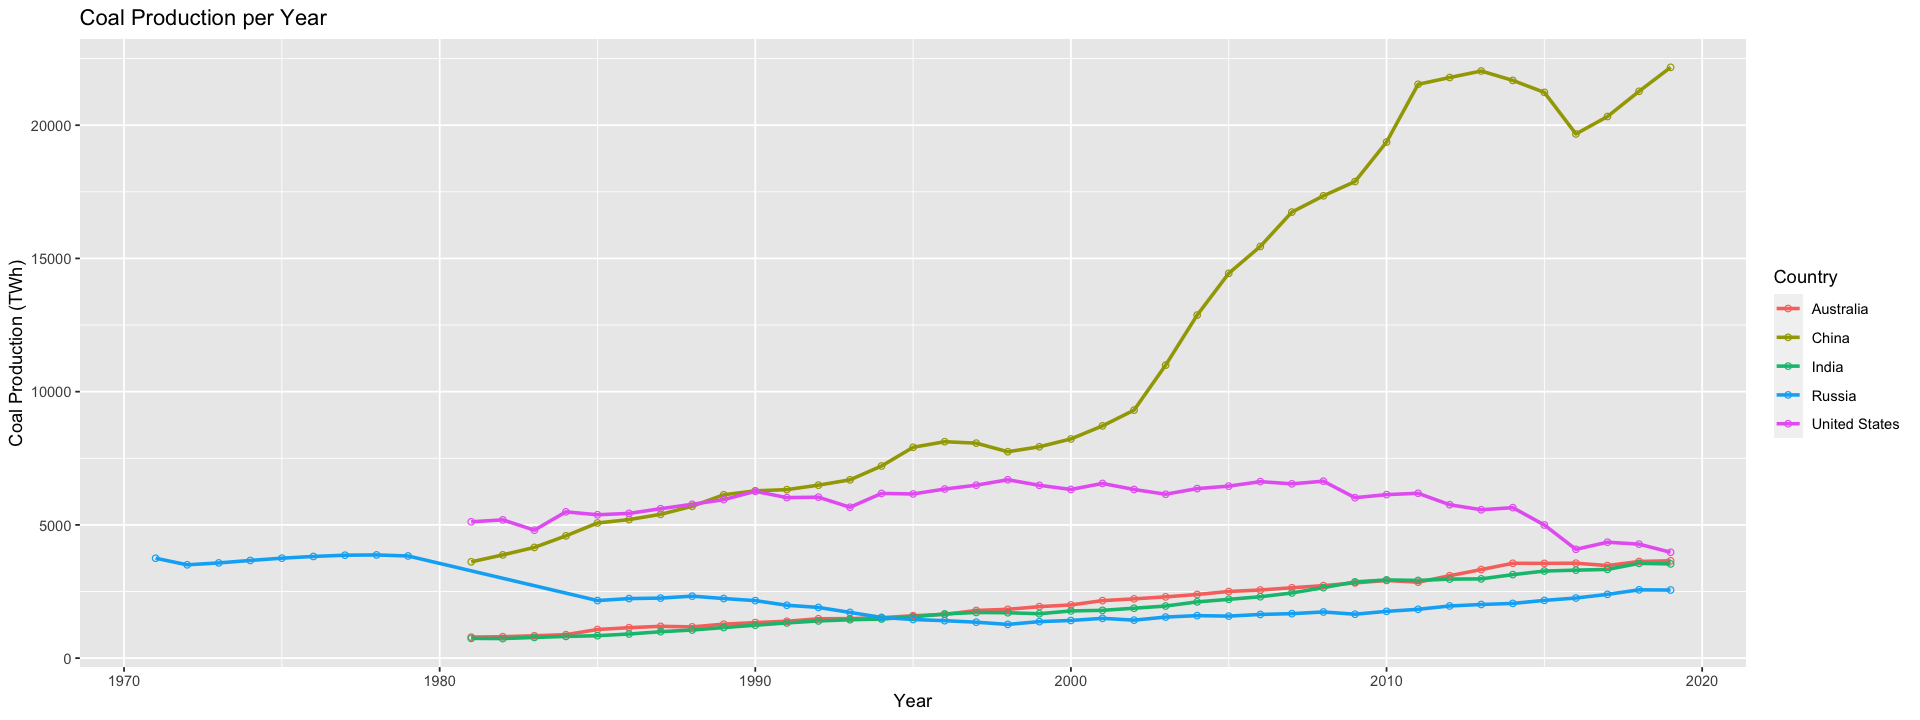

In [13]:
dft3_4 = dft %>% filter(Entity == 'China' | Entity == 'United States' | Entity == 'Russia' | Entity == 'Australia' | Entity == 'India')
options(repr.plot.width=16, repr.plot.height=6)
ggplot(data = dft3_4, aes(Year, Coal_ProductionTWh, group=factor(Entity), color=factor(Entity))) + geom_line(size=1) + ggtitle("Coal Production per Year")+ labs(x="Year", y="Coal Production (TWh)", color="Country") +geom_point(shape=1)


#### 5. generate a plot with the cumulative sum of the World’s coal production over the years

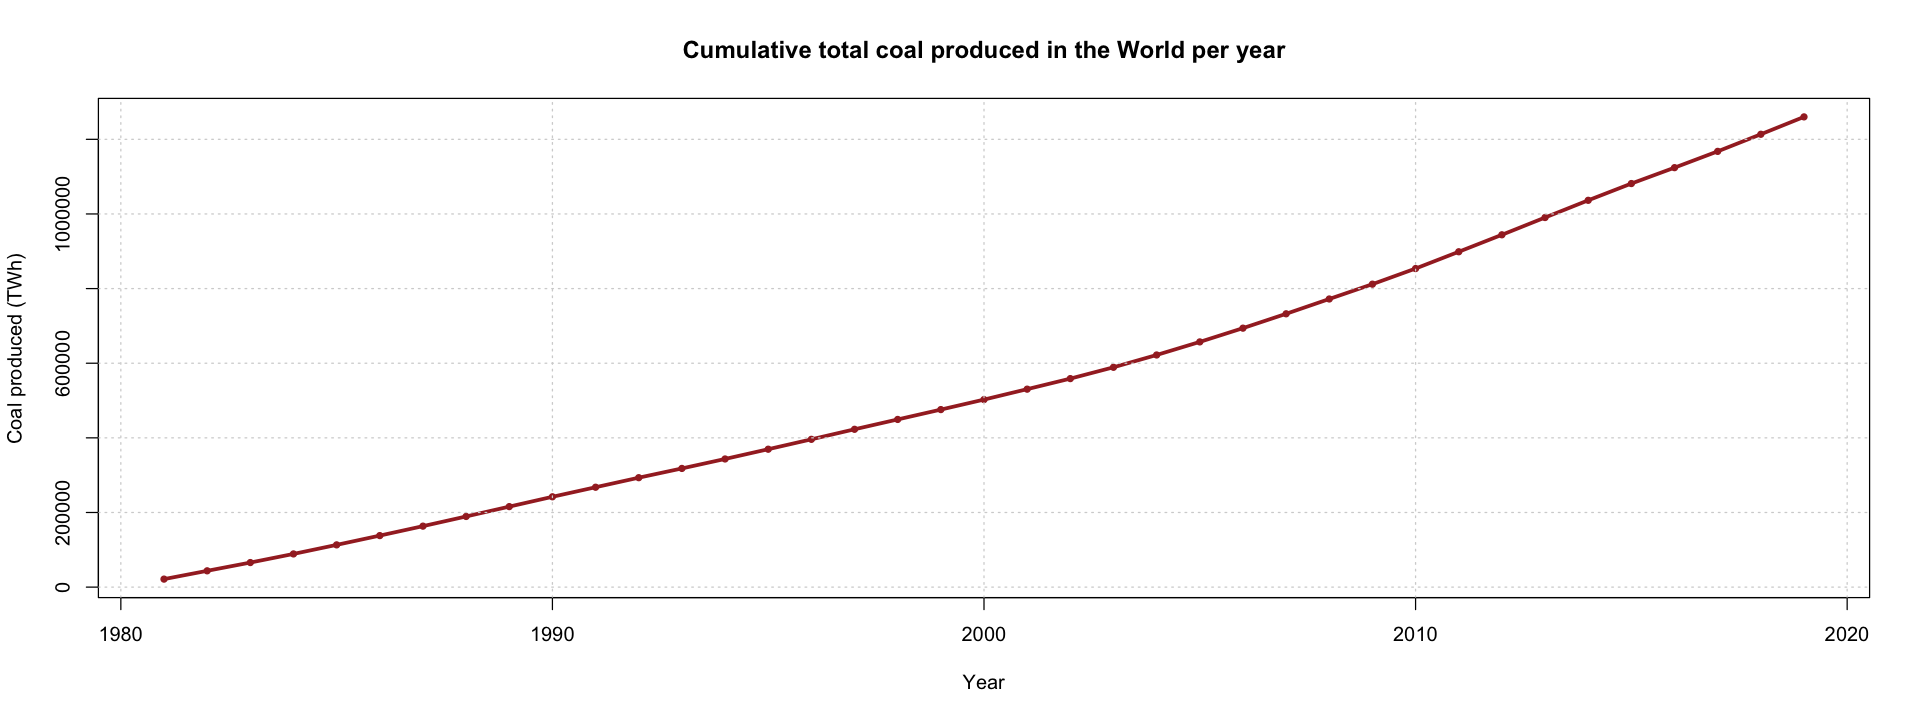

In [14]:
dft4_4 = dft %>% filter(Entity == 'World')
x = cumsum(dft4_4$Coal_ProductionTWh)
dft4_4['Cumsum'] <- x
plot(dft4_4$Year,dft4_4$Cumsum, pch=20, cex=1, col='brown', xlab='Year', ylab='Coal produced (TWh)')
lines(dft4_4$Year,dft4_4$Cumsum, col='brown', lty = 1, lw=3)
title('Cumulative total coal produced in the World per year')
grid()

## Exercise 4 - Covid19 Vaccine data
- Data on Covid-19 vaccine can be found on https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations.
- The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv contains a summary on the vaccination data grouped by Vaccine type and Country.

#### 1. filter() the original tibble by selecting the following countries: Italy

In [15]:
url_name = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'
x <- getURL(url_name)
df4 <- tibble(read.csv(text = x))
df_ita <- df4 %>% filter(location=='Italy')
df_ita$date <- as.Date(df_ita$date , format = "%Y-%m-%d")

head(df_ita)

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<int>
Italy,2020-12-27,Pfizer/BioNTech,7169
Italy,2020-12-28,Pfizer/BioNTech,8590
Italy,2020-12-29,Pfizer/BioNTech,9595
Italy,2020-12-30,Pfizer/BioNTech,14322
Italy,2020-12-31,Pfizer/BioNTech,39798
Italy,2021-01-01,Pfizer/BioNTech,50852


#### 2. plot the number of vaccines given as a function of time for the different vaccine manufacturer

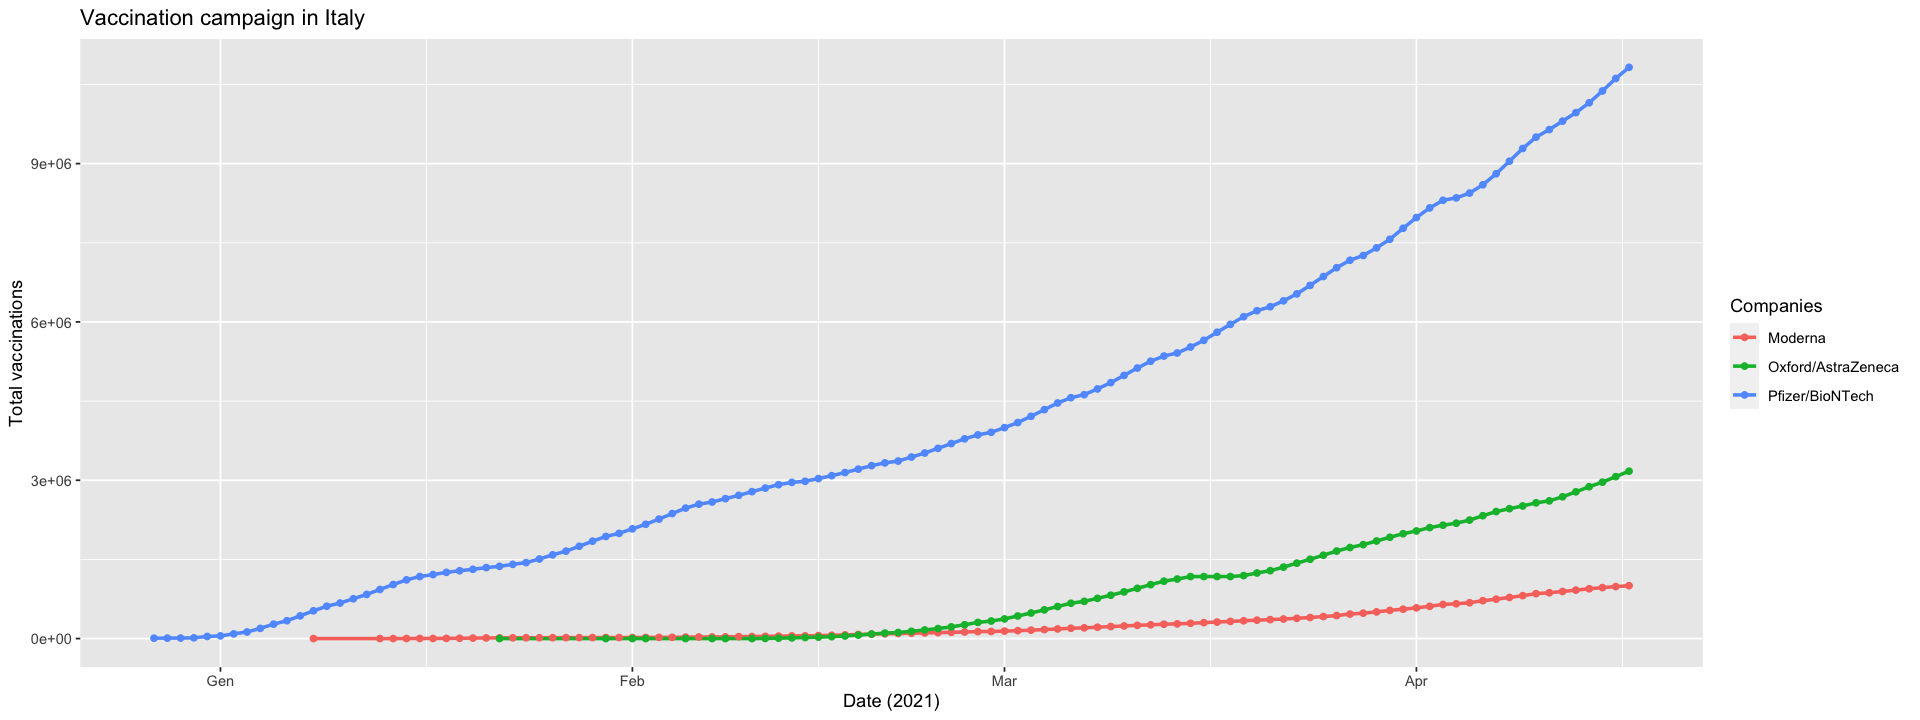

In [16]:
plot4 <- ggplot(data = df_ita, aes(date, total_vaccinations, group=factor(vaccine), color=factor(vaccine))) 
plot4 <- plot4 + geom_line(size=1) + labs(x="Date (2021)", y="Total vaccinations", color="Companies") + geom_point()
plot4 <- plot4 + scale_x_date(date_labels = "%b") + ggtitle('Vaccination campaign in Italy')
plot4

#### 3. from the same tibble plot the total number of vaccines shot per day in Italy

,date,Total,Daily
,<date>,<int>,<int>
1,2020-12-27,7169,NA
2,2020-12-28,8590,1421
3,2020-12-29,9595,1005
4,2020-12-30,14322,4727
5,2020-12-31,39798,25476
6,2021-01-01,50852,11054


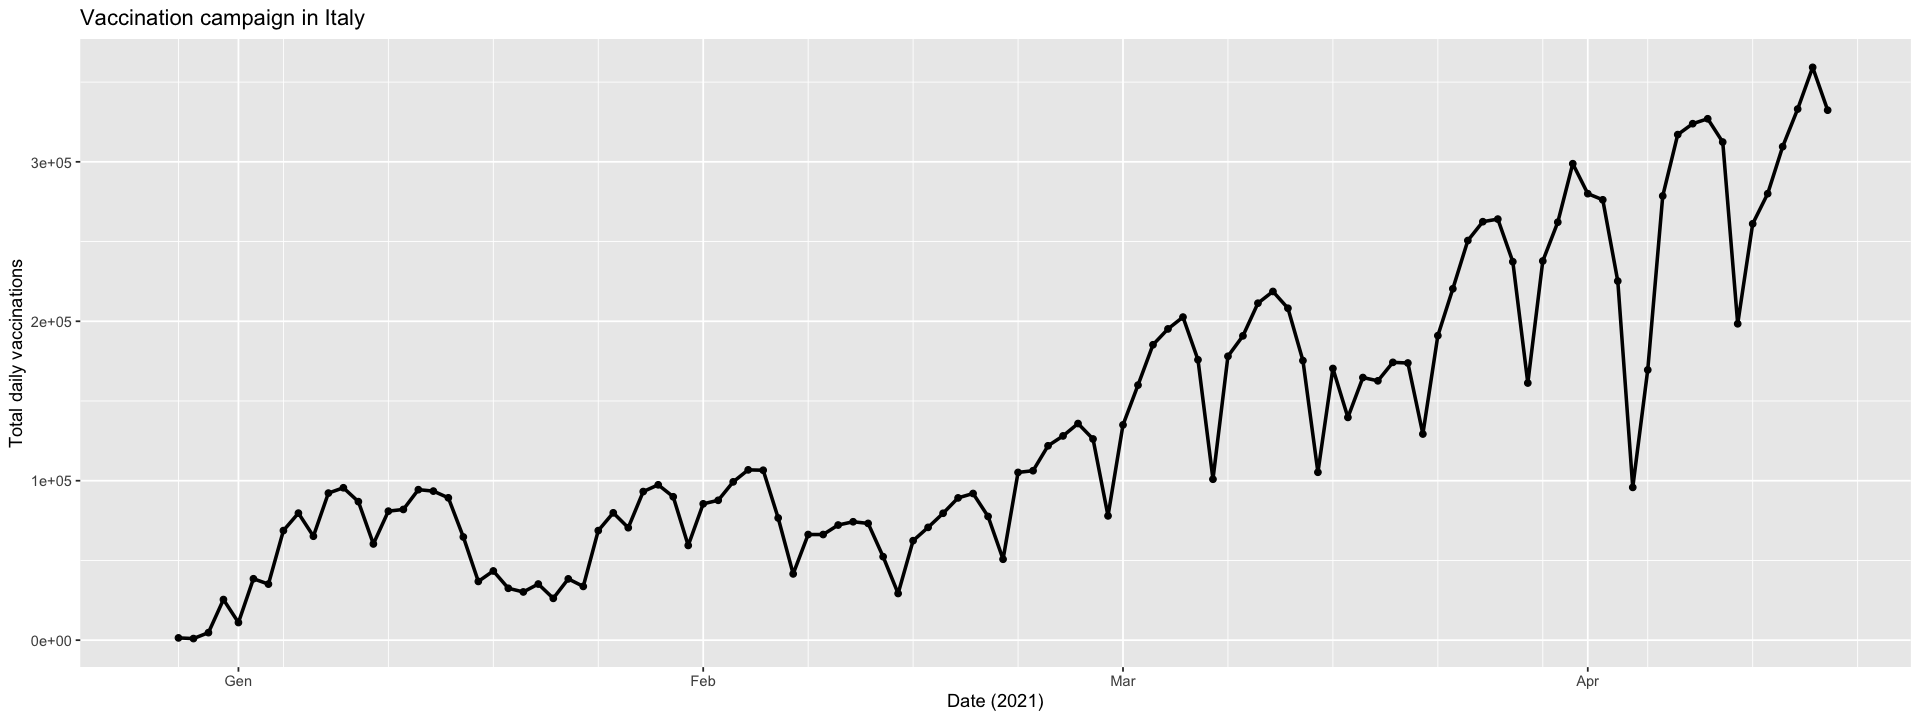

In [17]:
total_ita <- aggregate(df_ita$total_vaccinations, by=list(date=df_ita$date), FUN=sum)
total_ita['Daily'] <- c(NA,diff(total_ita[[2]]))
colnames(total_ita)[2] <- 'Total'
head(total_ita)
plot5 <- ggplot(total_ita, aes(date, Daily)) + geom_line(size=1) + labs(x="Date (2021)", y="Total daily vaccinations") 
plot5 <- plot5 + geom_point() + ggtitle('Vaccination campaign in Italy') + scale_x_date(date_breaks = "1 month", date_minor_breaks = "1 week", date_labels = "%b")
plot5

One may easily observe how the curve increases in the last months, given the larger contribute of Oxford/AstraZeneca vaccine. The trend is overall periodic: looking at the tics one may see a peak in the central days of the week, while in the weekend the vaccinations per day decrease.

#### 4. do the same exercise for the following countries: Germany and United States of America

- Here the analysis of Germany situation:

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<int>
Germany,2020-12-27,Moderna,0
Germany,2020-12-27,Oxford/AstraZeneca,0
Germany,2020-12-27,Pfizer/BioNTech,24296
Germany,2020-12-28,Moderna,0
Germany,2020-12-28,Oxford/AstraZeneca,0
Germany,2020-12-28,Pfizer/BioNTech,42679


,date,Total,Daily
,<date>,<int>,<int>
1,2020-12-27,24296,NA
2,2020-12-28,42679,18383
3,2020-12-29,91810,49131
4,2020-12-30,153641,61831
5,2020-12-31,203328,49687
6,2021-01-01,222599,19271


[1] "Here we plot the total number of vaccines per day and the overall number of vaccinations:"

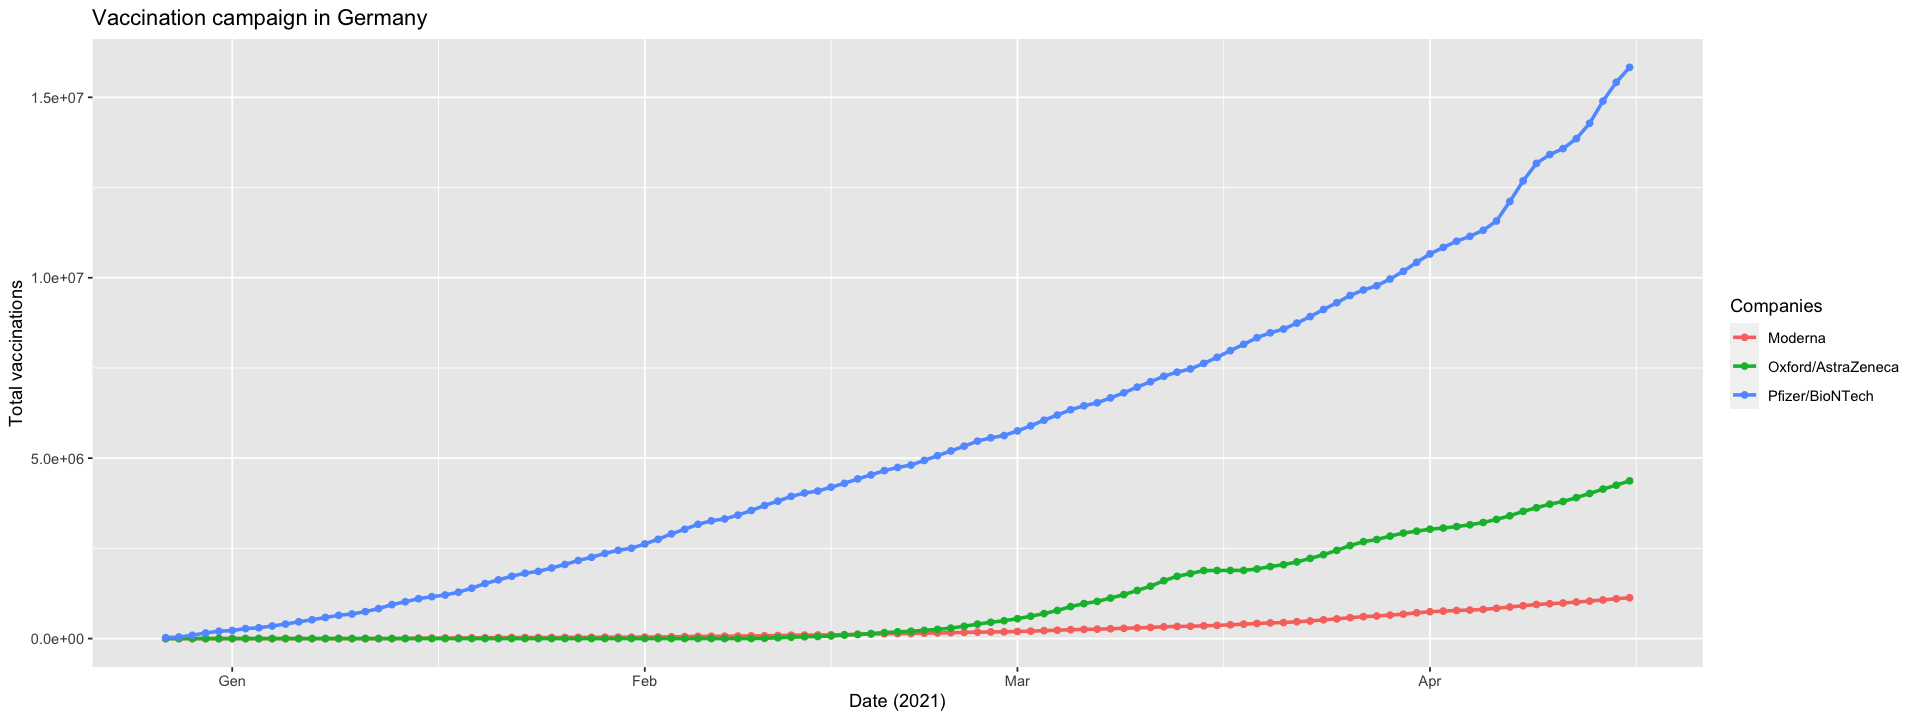

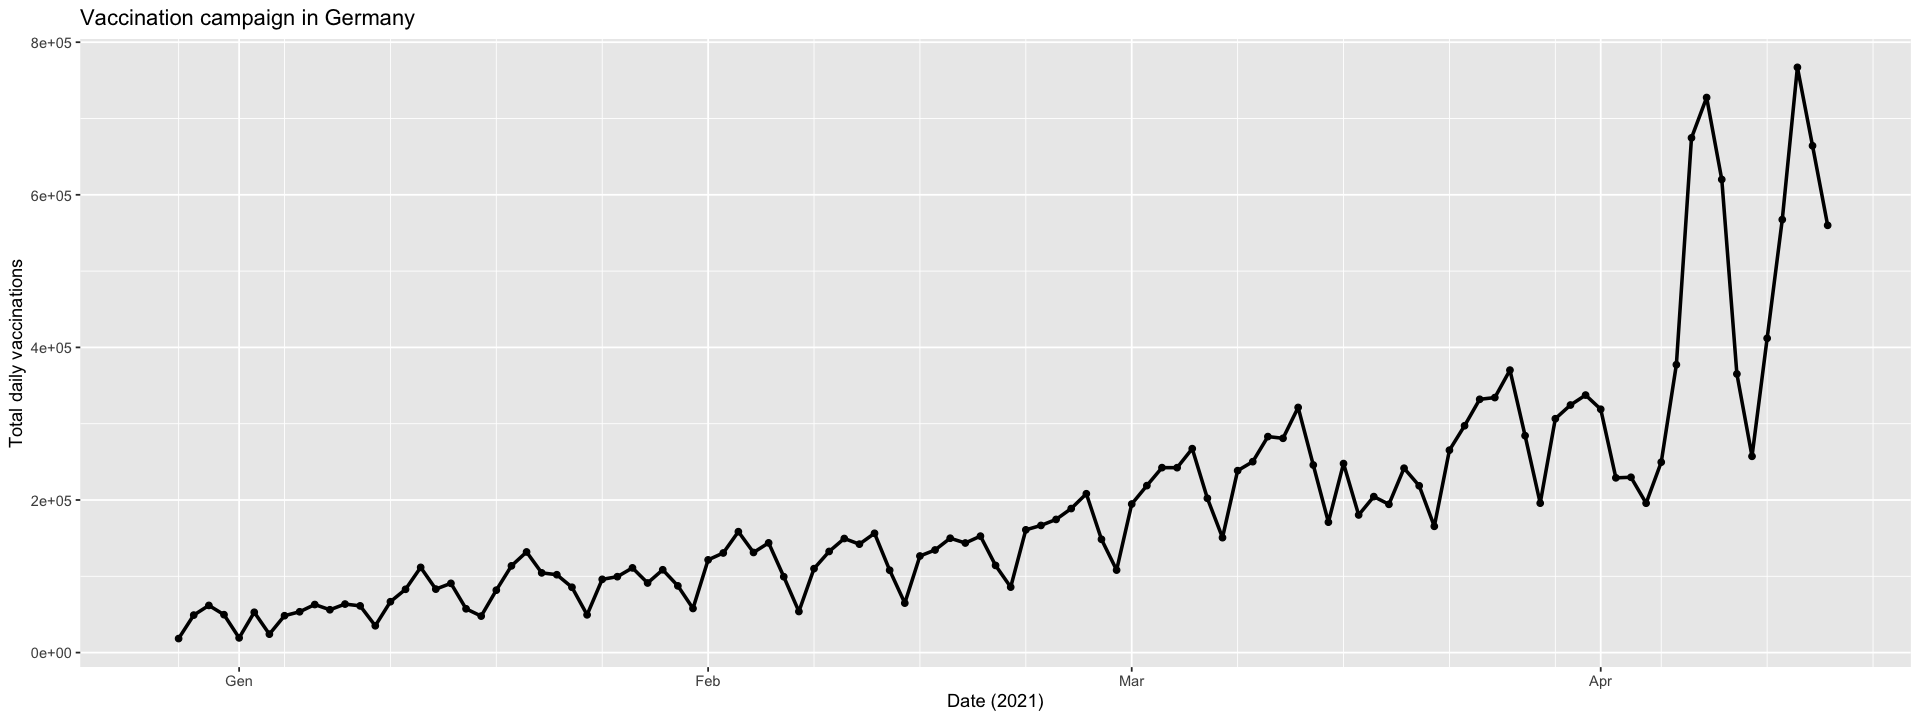

In [18]:
df_ger <- df4 %>% filter(location=='Germany')
df_ger$date <- as.Date(df_ger$date , format = "%Y-%m-%d")

head(df_ger)

plot4_ger <- ggplot(data = df_ger, aes(date, total_vaccinations, group=factor(vaccine), color=factor(vaccine))) 
plot4_ger <- plot4_ger + geom_line(size=1) + labs(x="Date (2021)", y="Total vaccinations", color="Companies") + geom_point()
plot4_ger <- plot4_ger + scale_x_date(date_labels = "%b") + ggtitle('Vaccination campaign in Germany')
plot4_ger

total_ger <- aggregate(df_ger$total_vaccinations, by=list(date=df_ger$date), FUN=sum)
total_ger['Daily'] <- c(NA,diff(total_ger[[2]]))
colnames(total_ger)[2] <- 'Total'
head(total_ger)
sprintf('Here we plot the total number of vaccines per day and the overall number of vaccinations:')
plot5 <- ggplot(total_ger, aes(date, Daily)) + geom_line(size=1) + labs(x="Date (2021)", y="Total daily vaccinations") 
plot5 <- plot5 + geom_point() + ggtitle('Vaccination campaign in Germany') + scale_x_date(date_breaks = "1 month", date_minor_breaks = "1 week", date_labels = "%b")
plot5

- Here the case for the US:

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<int>
United States,2021-01-12,Moderna,3835859
United States,2021-01-12,Pfizer/BioNTech,5488697
United States,2021-01-13,Moderna,4249795
United States,2021-01-13,Pfizer/BioNTech,6025872
United States,2021-01-15,Moderna,5122662
United States,2021-01-15,Pfizer/BioNTech,7153268


,date,Total,Daily
,<date>,<int>,<int>
1,2021-01-12,9324556,NA
2,2021-01-13,10275667,951111
3,2021-01-15,12275930,2000263
4,2021-01-19,15703372,3427442
5,2021-01-20,16520813,817441
6,2021-01-21,17541710,1020897


[1] "Here we plot the total number of vaccines per day and the overall number of vaccinations:"

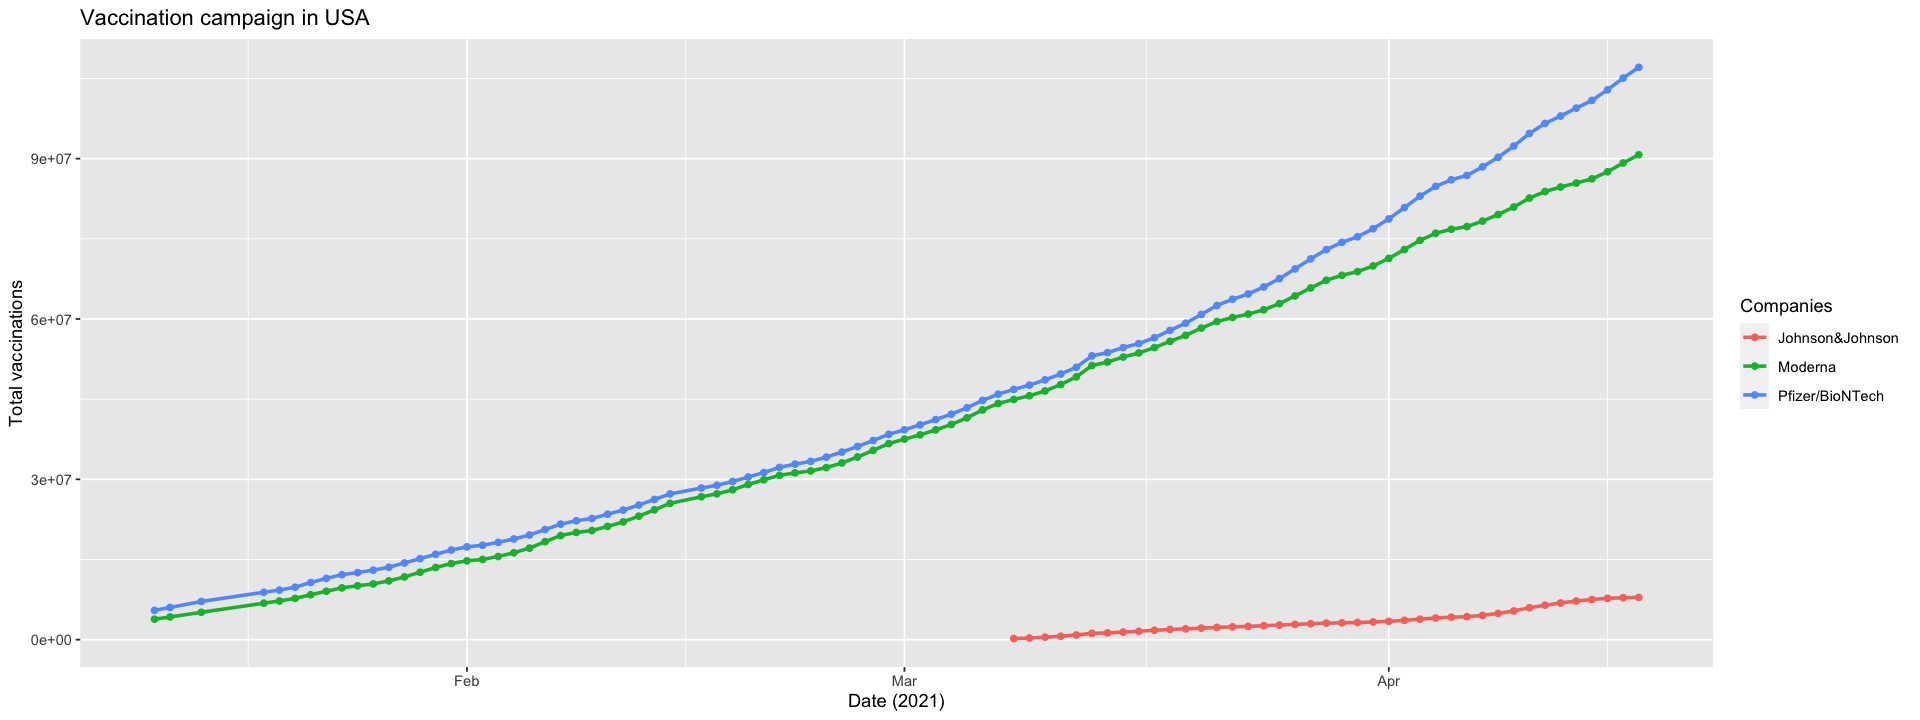

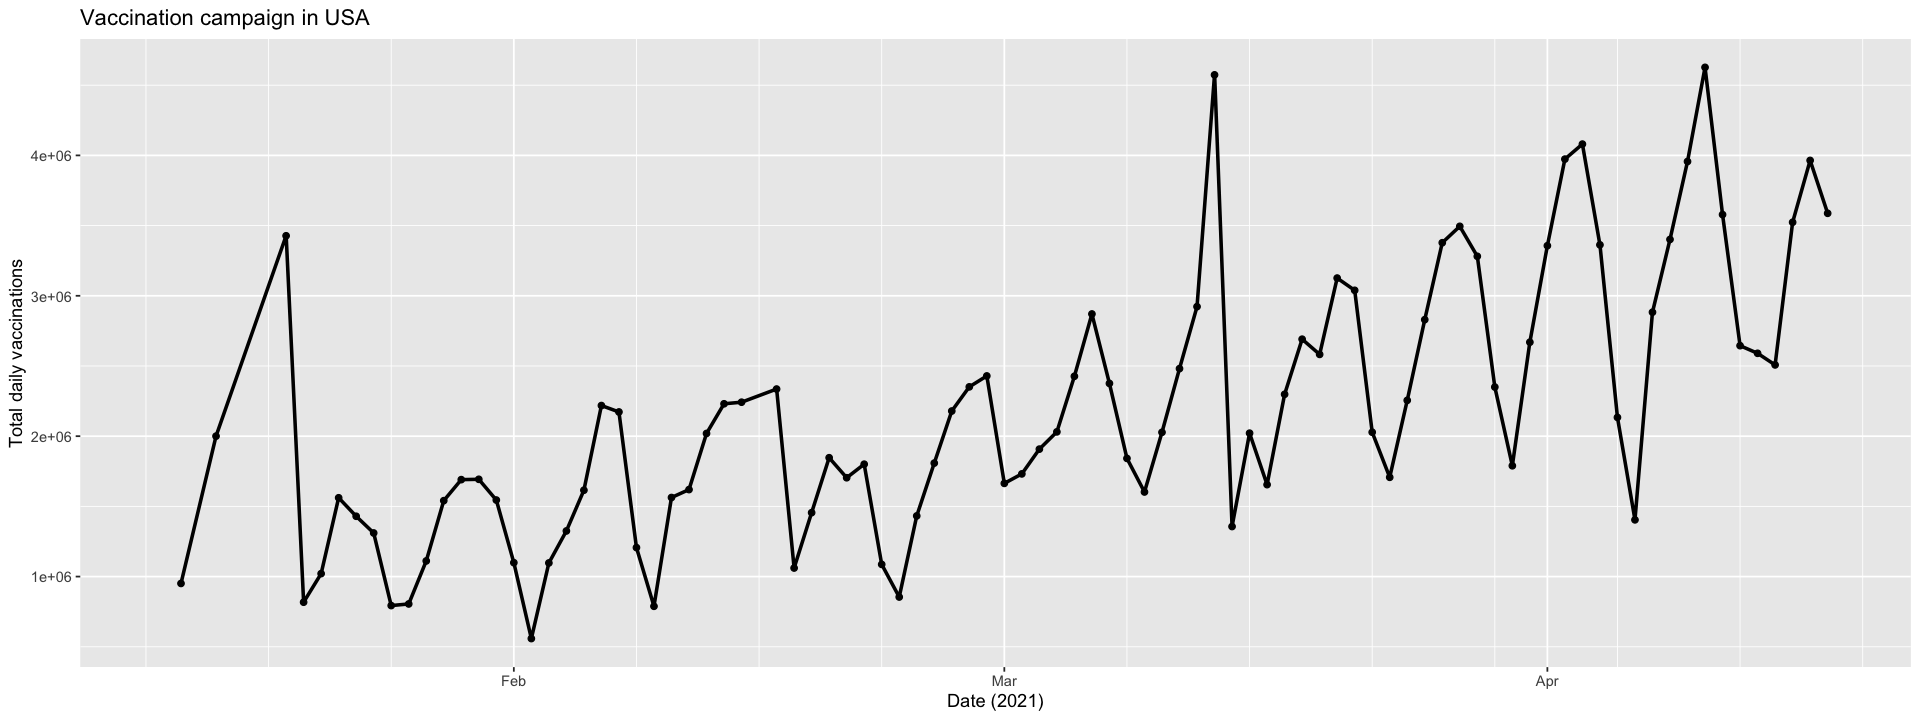

In [19]:
df_USA <- df4 %>% filter(location=='United States')
df_USA$date <- as.Date(df_USA$date , format = "%Y-%m-%d")

head(df_USA)

plot4_ger <- ggplot(data = df_USA, aes(date, total_vaccinations, group=factor(vaccine), color=factor(vaccine))) 
plot4_ger <- plot4_ger + geom_line(size=1) + labs(x="Date (2021)", y="Total vaccinations", color="Companies") + geom_point()
plot4_ger <- plot4_ger + scale_x_date(date_labels = "%b") + ggtitle('Vaccination campaign in USA')
plot4_ger

total_usa <- aggregate(df_USA$total_vaccinations, by=list(date=df_USA$date), FUN=sum)
total_usa['Daily'] <- c(NA,diff(total_usa[[2]]))
colnames(total_usa)[2] <- 'Total'
head(total_usa)
sprintf('Here we plot the total number of vaccines per day and the overall number of vaccinations:')
plot5 <- ggplot(total_usa, aes(date, Daily)) + geom_line(size=1) + labs(x="Date (2021)", y="Total daily vaccinations") 
plot5 <- plot5 + geom_point() + ggtitle('Vaccination campaign in USA') + scale_x_date(date_breaks = "1 month", date_minor_breaks = "1 week", date_labels = "%b")
plot5

#### EXTRAPLOT

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<int>
Germany,2020-12-27,Moderna,0
Germany,2020-12-27,Oxford/AstraZeneca,0
Germany,2020-12-27,Pfizer/BioNTech,24296
Germany,2020-12-28,Moderna,0
Germany,2020-12-28,Oxford/AstraZeneca,0
Germany,2020-12-28,Pfizer/BioNTech,42679


,date,location,Total,Daily
,<date>,<fct>,<int>,<int>
1,2020-12-27,Germany,24296,NA
2,2020-12-28,Germany,42679,18383
3,2020-12-29,Germany,91810,49131
4,2020-12-30,Germany,153641,61831
5,2020-12-31,Germany,203328,49687
6,2021-01-01,Germany,222599,19271


[1] "Here we plot the total number of vaccines per day and the overall number of vaccinations:"

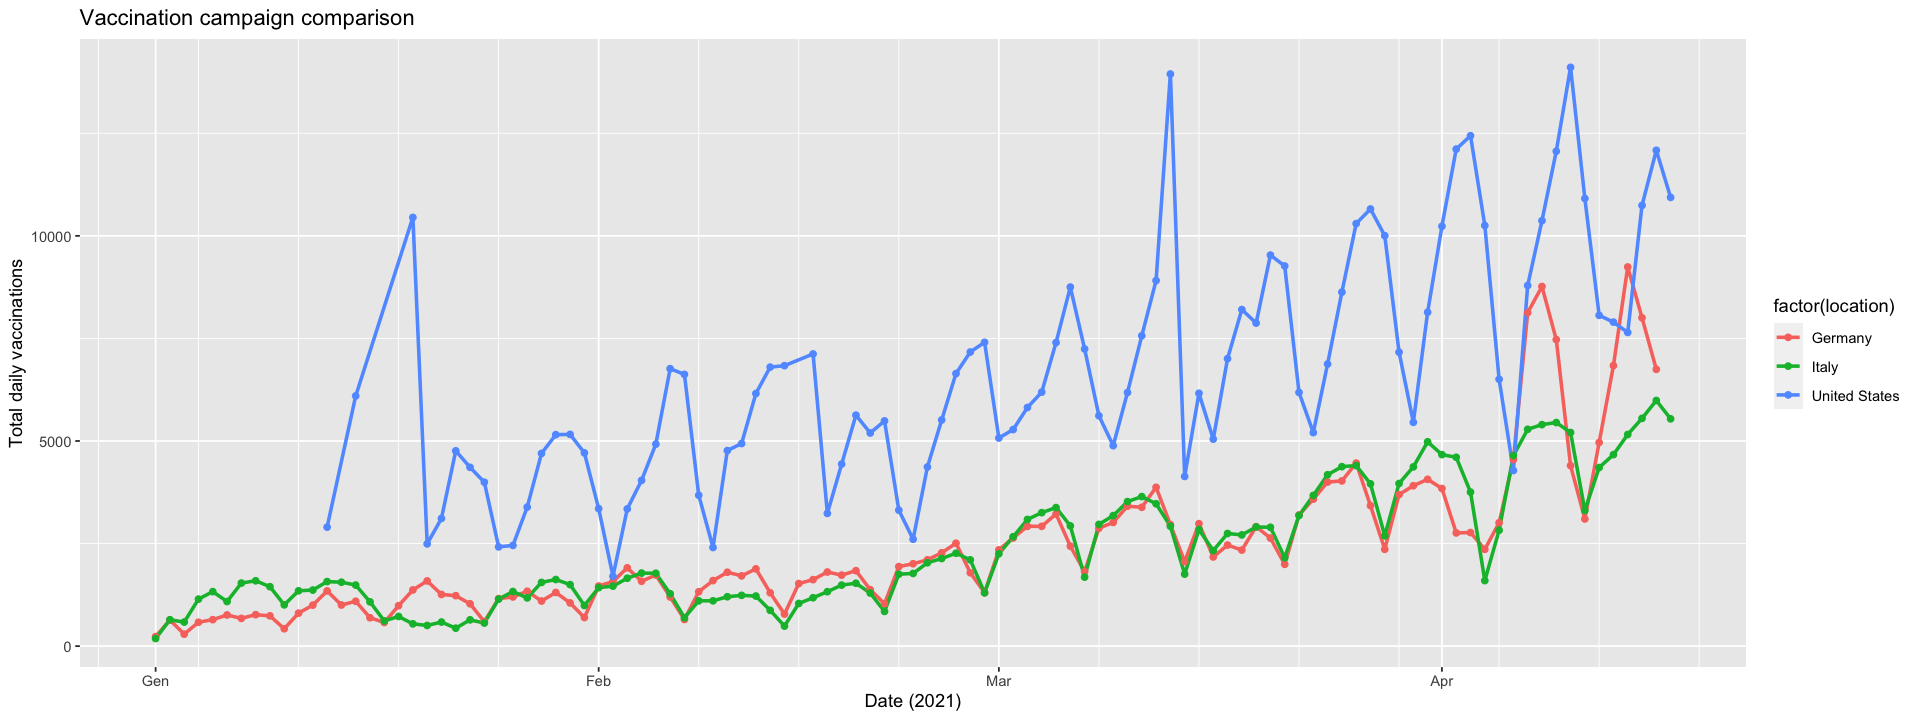

In [20]:
#Some final comparisons:
df_int <- df4 %>% filter(location=='United States'|location=='Italy'|location=='Germany')
df_int$date <- as.Date(df_int$date , format = "%Y-%m-%d")
head(df_int)

total <- aggregate(df_int$total_vaccinations, by=list(date=df_int$date, location=factor(df_int$location)), FUN=sum)
total['Daily'] <- c(NA,diff(total[[3]]))
colnames(total)[3] <- 'Total'
head(total)
total <- total %>% filter(date>=as.Date("2021-01-01"))
total <- total %>% filter(Daily>=0)
scales = c(60, 83, 328)   #millions of inhabitants (ITA/GER/USA)
total[total$location=='Italy','Daily'] = total[total$location=='Italy','Daily']/scales[1]
total[total$location=='Germany','Daily'] = total[total$location=='Germany','Daily']/scales[2]
total[total$location=='United States','Daily'] = total[total$location=='United States','Daily']/scales[3]
sprintf('Here we plot the total number of vaccines per day and the overall number of vaccinations:')
plot5 <- ggplot(total, aes(date, Daily, group=factor(location), color=factor(location))) + geom_line(size=1) + labs(x="Date (2021)", y="Total daily vaccinations") 
plot5 <- plot5 + geom_point() + ggtitle('Vaccination campaign comparison') + scale_x_date(date_breaks = "1 month", date_minor_breaks = "1 week", date_labels = "%b")
plot5

In this final graph I wanted to compare the daily doses of vaccine provided for the three counties: in particular, I rescaled the data accordingly to the total population of these countries. As a result, Italy and Germany share similar trends (same overall growth and daily success as well as similar overall surface and people number). US data are better of a factor $\sim$2.5, which is not promising according to the fact that US surface is almost 30 times bigger that the one of european countries. This means that the overall density of vaccinate people per day is still low. We will see how trends will evolve in the next months.

- The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19 vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scot- land, Wales, ...) and international aggregates (World, continents, European Union ldots). They can be identified by their iso code that starts with OWID

#### 1. selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date

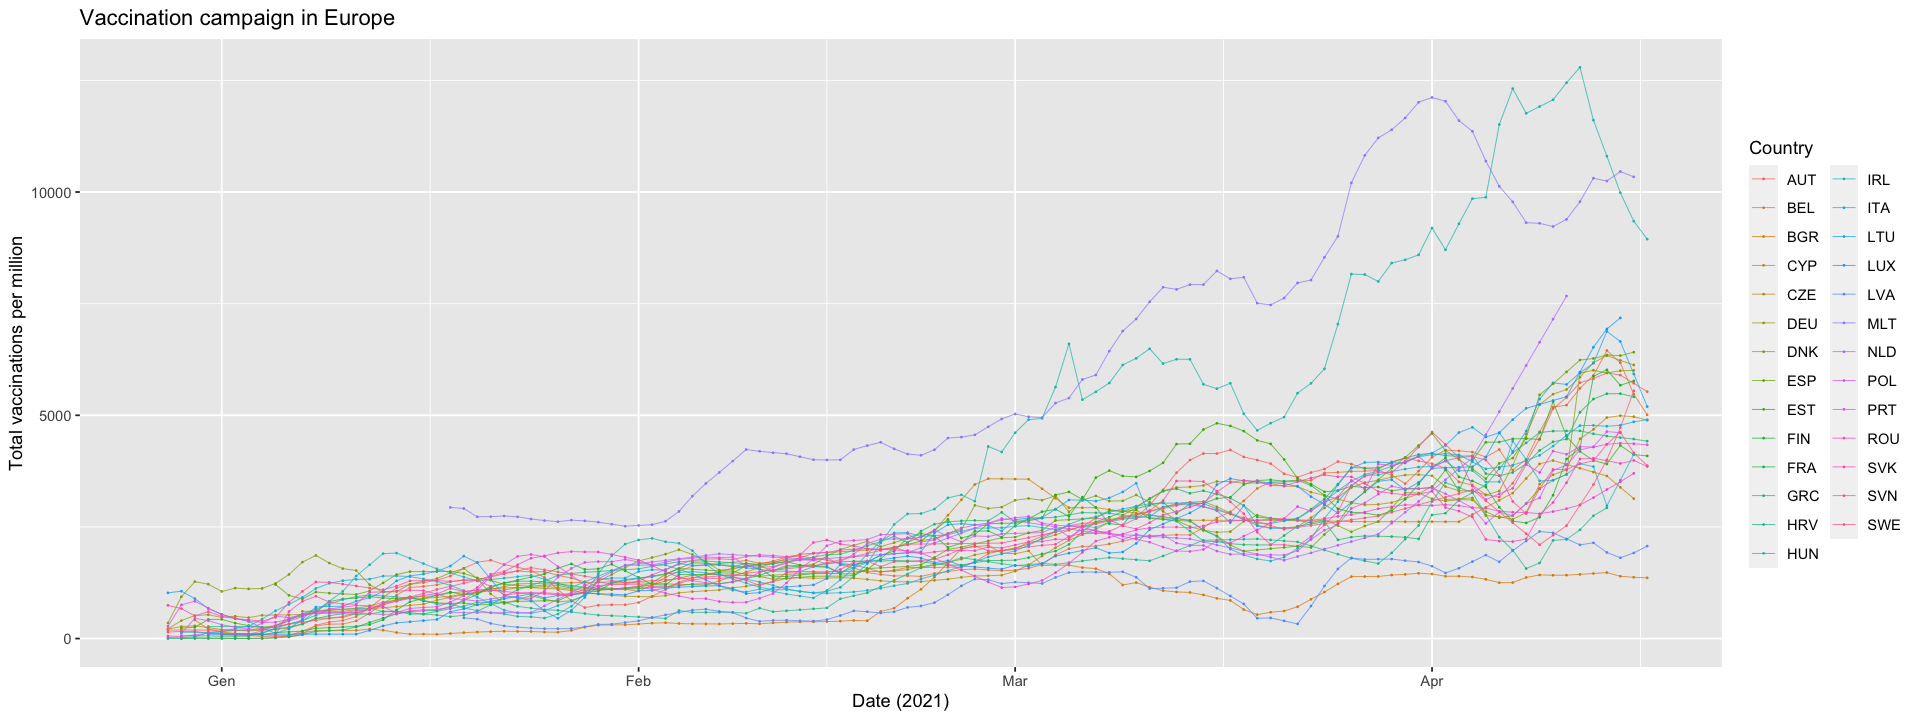

In [21]:
url_name = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
x <- getURL(url_name)
df5 <- tibble(read.csv(text = x))
df5$date <- as.Date(df5$date , format = "%Y-%m-%d")
#From the net:
Europe_ISO = c('AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE')
df5 <- df5 %>% filter(iso_code %in% Europe_ISO)

plot5 <- ggplot(data = df5, aes(date, daily_vaccinations_per_million, group=factor(iso_code), color=factor(iso_code))) 
plot5 <- plot5 + geom_line(size=0.2) + labs(x="Date (2021)", y="Total vaccinations per million", color="Country") + geom_point(size=0.1)
plot5 <- plot5 + scale_x_date(date_labels = "%b") + ggtitle('Vaccination campaign in Europe')

plot5

In [22]:
print("Those are at the 10th of April the three countries with highest vaccination per million:")
df5 <- df5 %>% filter(date == as.Date("2021-04-10"))
head(df5[order(df5$daily_vaccinations_per_million, decreasing = TRUE),],n=3)

[1] "Those are at the 10th of April the three countries with highest vaccination per million:"


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
Hungary,HUN,2021-04-10,4033579,2835894,1197685,101166,116566,41.75,29.36,12.4,12066
Malta,MLT,2021-04-10,240984,171678,69306,3178,4074,54.58,38.88,15.7,9227
Netherlands,NLD,2021-04-10,NA,NA,NA,NA,122551,NA,NA,NA,7152


#### 2. study the data structure and produce few relevant plots of your taste

The first interesting extra plot is the one produced for point 4b.1 comparing The average pro-capite results for Us, Germany and Italy (section "EXTRAPLOT" above). 

Here, a comparison between continents and larger institutions is provided:

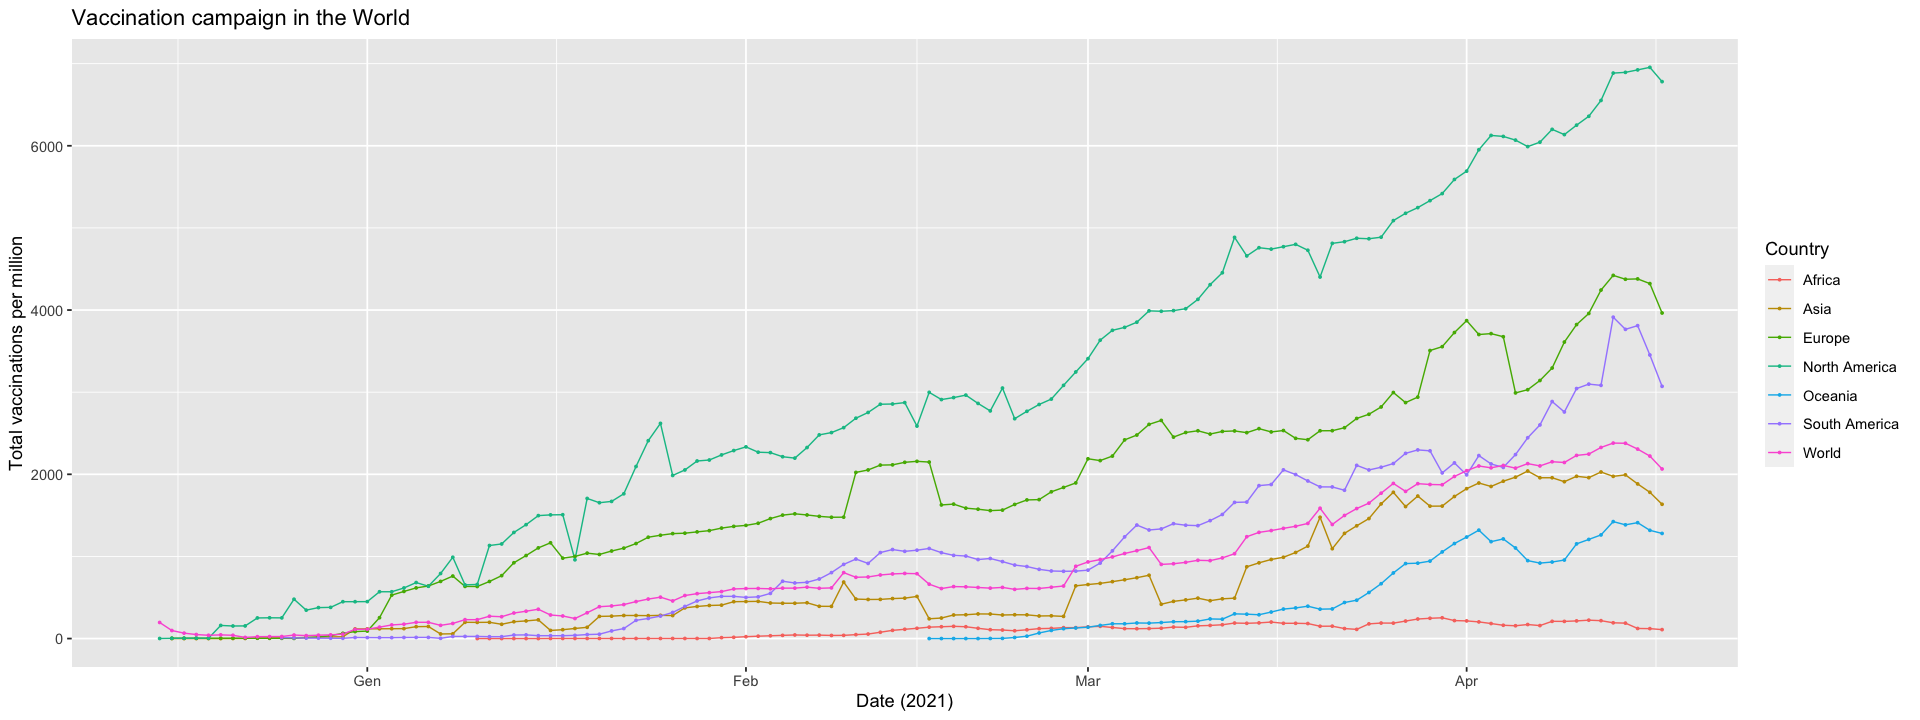

In [23]:
url_name = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
x <- getURL(url_name)
df6 <- tibble(read.csv(text = x))
df6$date <- as.Date(df6$date , format = "%Y-%m-%d")
#grepl( needle, haystack, fixed = TRUE)
value = 'OWID'
df6 <- df6 %>% filter(grepl(value, df6$iso_code, fixed = TRUE), drop.na = TRUE)
df6 <- df6 %>% filter(df6$location != 'Scotland' & df6$location != 'Kosovo' & df6$location != 'England' & df6$location != 'Northern Cyprus' & df6$location != 'Northern Ireland' & df6$location != 'Wales' & df6$location != 'European Union')

plot6 <- ggplot(data = df6, aes(date, daily_vaccinations_per_million, group=factor(location), color=factor(location))) 
plot6 <- plot6 + geom_line(size=0.4) + labs(x="Date (2021)", y="Total vaccinations per million", color="Country") + geom_point(size=0.4)
plot6 <- plot6 + scale_x_date(date_labels = "%b") + ggtitle('Vaccination campaign in the World')

plot6

As one can see in the graph above, the vaccination campaign has grown more or less sistematically over the last few months all over the world. While in Africa the rate is still very low, Europe and South America lead the way towards record values. It is aslo noticeable how in Ocenania, despite of the late begin, the curve is rocketing to high vaccination rates.

Finally, another study on Italy's case:

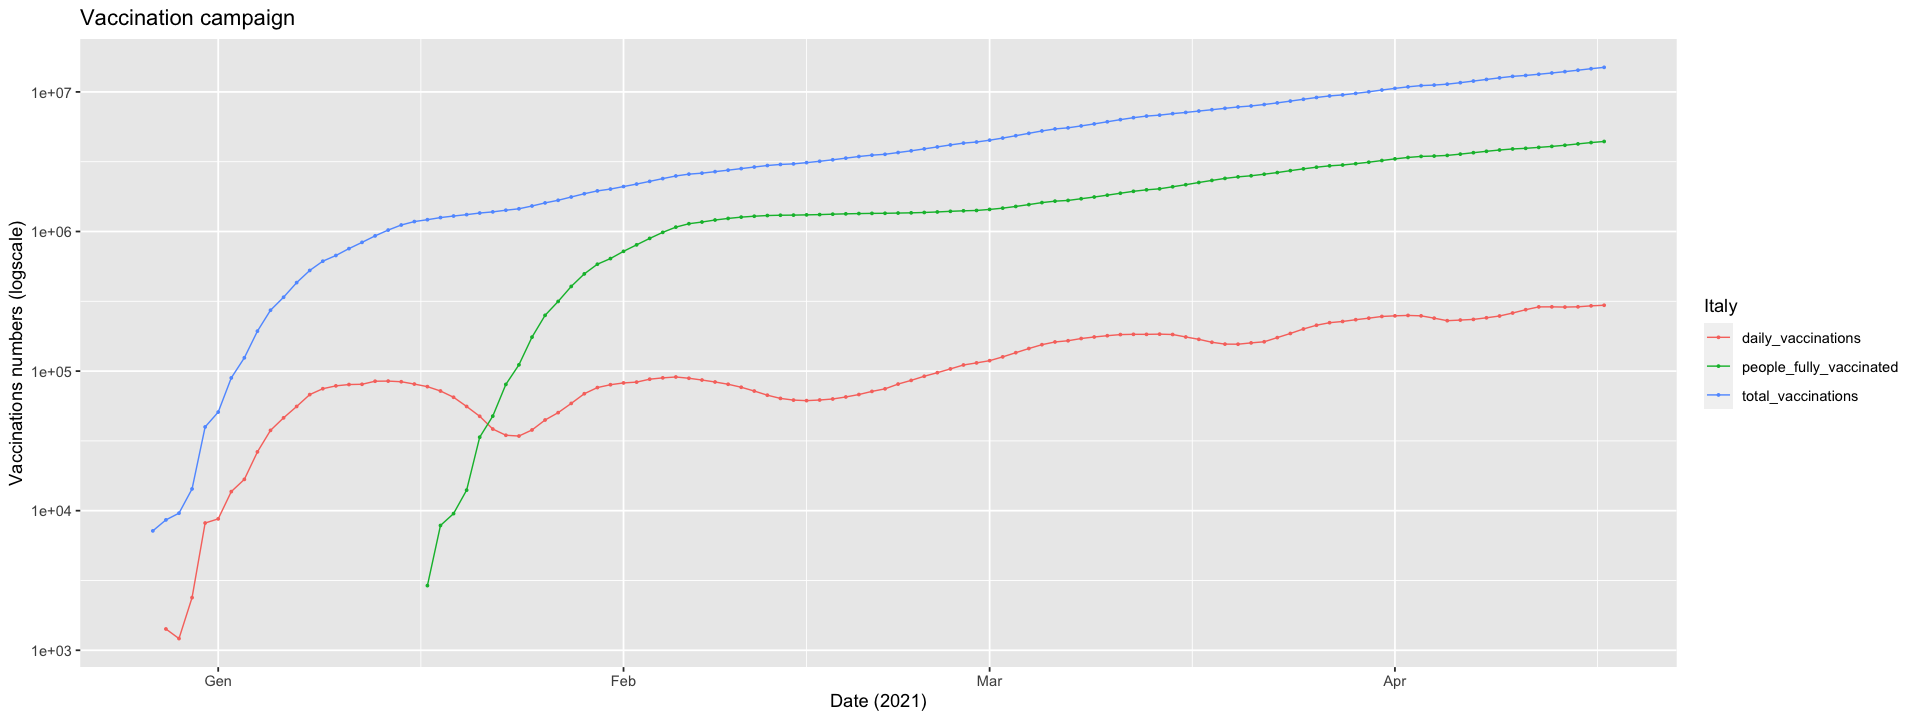

In [24]:
df6 <- tibble(read.csv(text = x))
df6 <- df6 %>% filter(df6$location == 'Italy')
df6$date <- as.Date(df6$date , format = "%Y-%m-%d")

DFtall <- df6 %>% pivot_longer(names_to = "Data_type", values_to = "Vals", c(total_vaccinations, people_fully_vaccinated, daily_vaccinations))

plot7 <- ggplot(data = DFtall, aes(date, Vals, group=factor(Data_type), color=factor(Data_type))) 
plot7 <- plot7 + geom_line(size=0.4) + labs(x="Date (2021)", y="Vaccinations numbers (logscale)", color="Italy") + geom_point(size=0.4)
plot7 <- plot7 + scale_x_date(date_labels = "%b") + ggtitle('Vaccination campaign') + scale_y_continuous(trans = "log10")

plot7

The plot above tells us some intersting facts about the vaccination campaign in Italy: firstly, we can notice how the curves of total vaccinations performed and people fully faccinated are close in form to each other (the curve is basically the same, shifted three weeks later). This means that the priority of the campaing is to enlarge at the maximum the number of fully vaccinated people and (up to an error due to different companies instructions for the subministration of the second dose of vaccine) people who got the first dose get priority for the second one. 
Another interesting hint about this fact: the daily number of vaccinations has grown continuously over the last few months, yet is has been oscillating and does not depict a steady trend. Nevertheless, the growth of fully vaccinated people is perfectly exponential. From this we can conclude that while people waiting for the second dore respect a really strict schedule, the number of first vaccinations can vary a lot accordingly to various factors (e.g., the number of available doses).